# 1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE



In this work, we have applied machine learningbased algorithms that predicts the cost at which a player can be
sold in the Indian Premier League Auction. We estimated the
players’ selling price using their past performance parameters
like runs, balls, innings, wickets and matches played. Tests
were carried out in various machine learning models like
Decision Tree Regressor, Linear Regression, Random Forest
Regressor. Among these Random Forest Regressor and Linear Regression gave best results for predicting
batsman and bowlers respectively. These algorithms can
produce fast and accurate results within 3 seconds, helping
auctioneers make quick decisions. We have also considered
inflation factor and mapping of the same to the budget during
the training of the model.
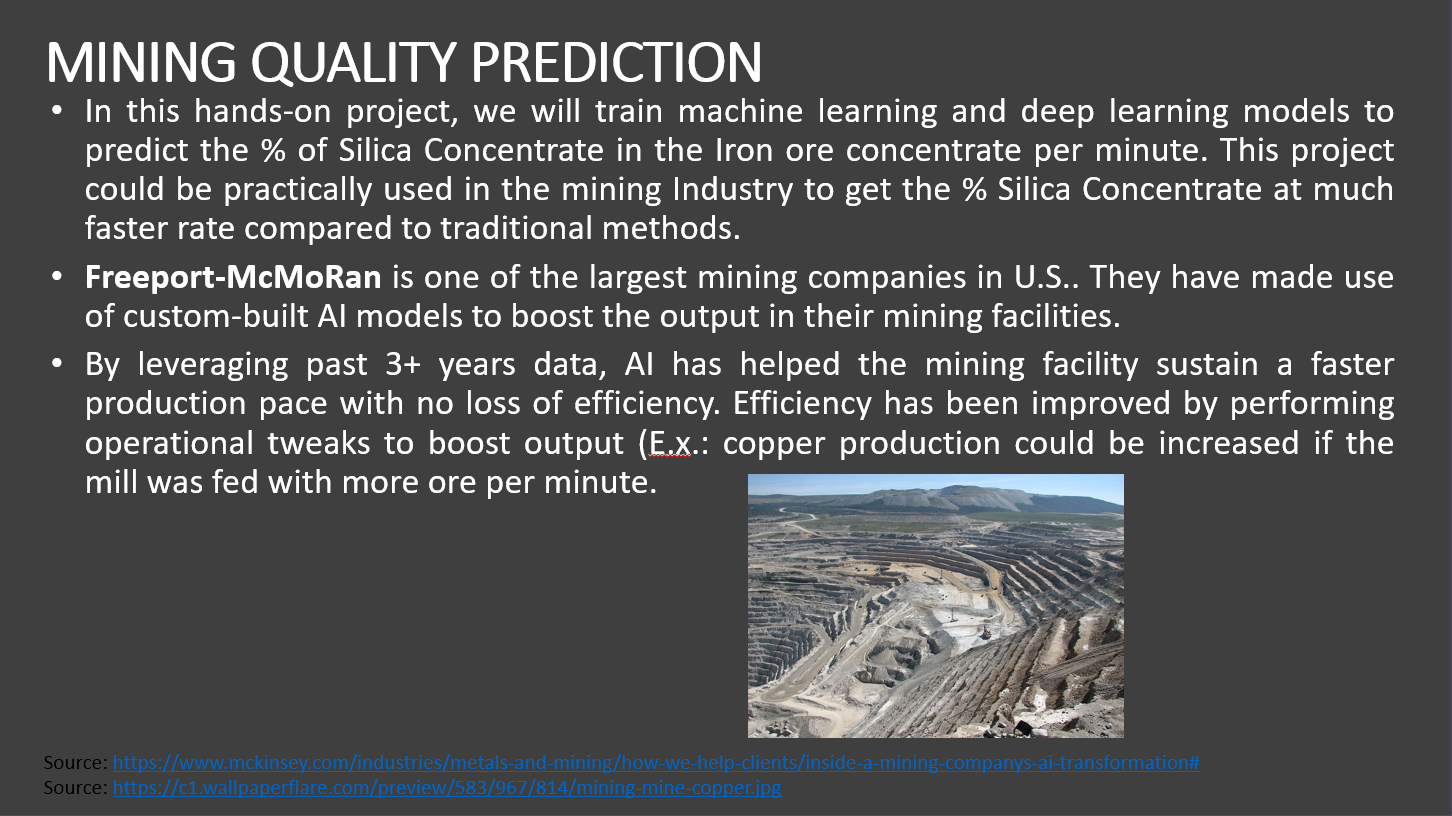

# 2: IMPORT LIBRARIES/DATASETS AND PERFORM DATA EXPLORATION 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [9]:
PSL_dataset_df = pd.read_csv('./PSL_DATASET_Batters.csv')

In [10]:
PSL_dataset_df

,Player,Span,Match,Inns,Not_Outs,Runs,HS,Ave,BF,SR,100,50,0,4s,Prices in $
0,Kamran Akmal,2016-2020,56,55,2,1537,107,29.00,1111,138.34,3,9,8,158,10000
1,Babar Azam,2016-2020,47,45,5,1516,78,37.90,1285,117.97,0,14,5,163,12000
2,SR Watson,2016-2020,46,46,4,1361,91,32.40,982,138.59,0,9,2,123,8000
3,Shoaib Malik,2016-2020,48,44,8,1127,68,31.30,919,122.63,0,7,2,74,3000
4,Ahmed Shehzad,2016-2020,45,43,2,1077,99,26.26,897,120.06,0,9,4,109,4000
5,Fakhar Zaman,2017-2020,40,40,0,1064,94,26.60,775,137.29,0,7,3,111,5000
6,L Ronchi,2018-2020,31,31,3,1020,94,36.42,614,166.12,0,10,4,116,6000
7,Mohammad Hafeez,2016-2020,48,45,6,1002,98,25.69,854,117.33,0,6,4,97,2000
8,RR Rossouw,2017-2020,40,37,9,962,100,34.35,734,131.06,1,3,2,85,3000
9,Sarfaraz Ahmed,2016-2020,52,43,12,868,56,28.00,694,125.07,0,3,2,74,8500


In [11]:
PSL_dataset_df.dtypes

Player          object
Span            object
Match            int64
Inns             int64
Not_Outs         int64
Runs             int64
HS               int64
Ave            float64
BF               int64
SR             float64
100              int64
50               int64
0                int64
4s               int64
Prices in $      int64
dtype: object

In [13]:
# check the number of null elements in the dataframe
PSL_dataset_df.isnull().sum()

Player         0
Span           0
Match          0
Inns           0
Not_Outs       0
Runs           0
HS             0
Ave            0
BF             0
SR             0
100            0
50             0
0              0
4s             0
Prices in $    0
dtype: int64

In [17]:
PSL_dataset_df.describe()


,Match,Inns,Not_Outs,Runs,HS,Ave,BF,SR,100,50,0,4s,Prices in $
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000
mean,30.460000,27.140000,4.740000,620.900000,76.040000,27.656400,476.060000,131.704800,0.160000,3.500000,2.060000,55.540000,5346.000
std,12.663961,11.045379,3.652285,318.874887,20.785552,5.670224,248.237165,16.520623,0.509502,2.943343,1.658743,33.702304,3258.221
min,8.000000,8.000000,0.000000,280.000000,42.000000,16.840000,158.000000,104.860000,0.000000,0.000000,0.000000,18.000000,1500.000
25%,20.000000,18.250000,2.000000,400.250000,61.000000,23.772500,296.250000,119.032500,0.000000,1.250000,1.000000,31.250000,2500.000
50%,29.000000,24.000000,4.000000,502.000000,73.000000,27.460000,382.500000,129.025000,0.000000,3.000000,2.000000,45.500000,4500.000
75%,40.750000,35.750000,7.000000,770.000000,90.250000,32.375000,596.500000,139.025000,0.000000,4.750000,3.000000,66.750000,8000.000
max,56.000000,55.000000,14.000000,1537.000000,127.000000,40.570000,1285.000000,179.740000,3.000000,14.000000,8.000000,163.000000,12000.000


# 3: PERFORM DATA VISUALIZATION

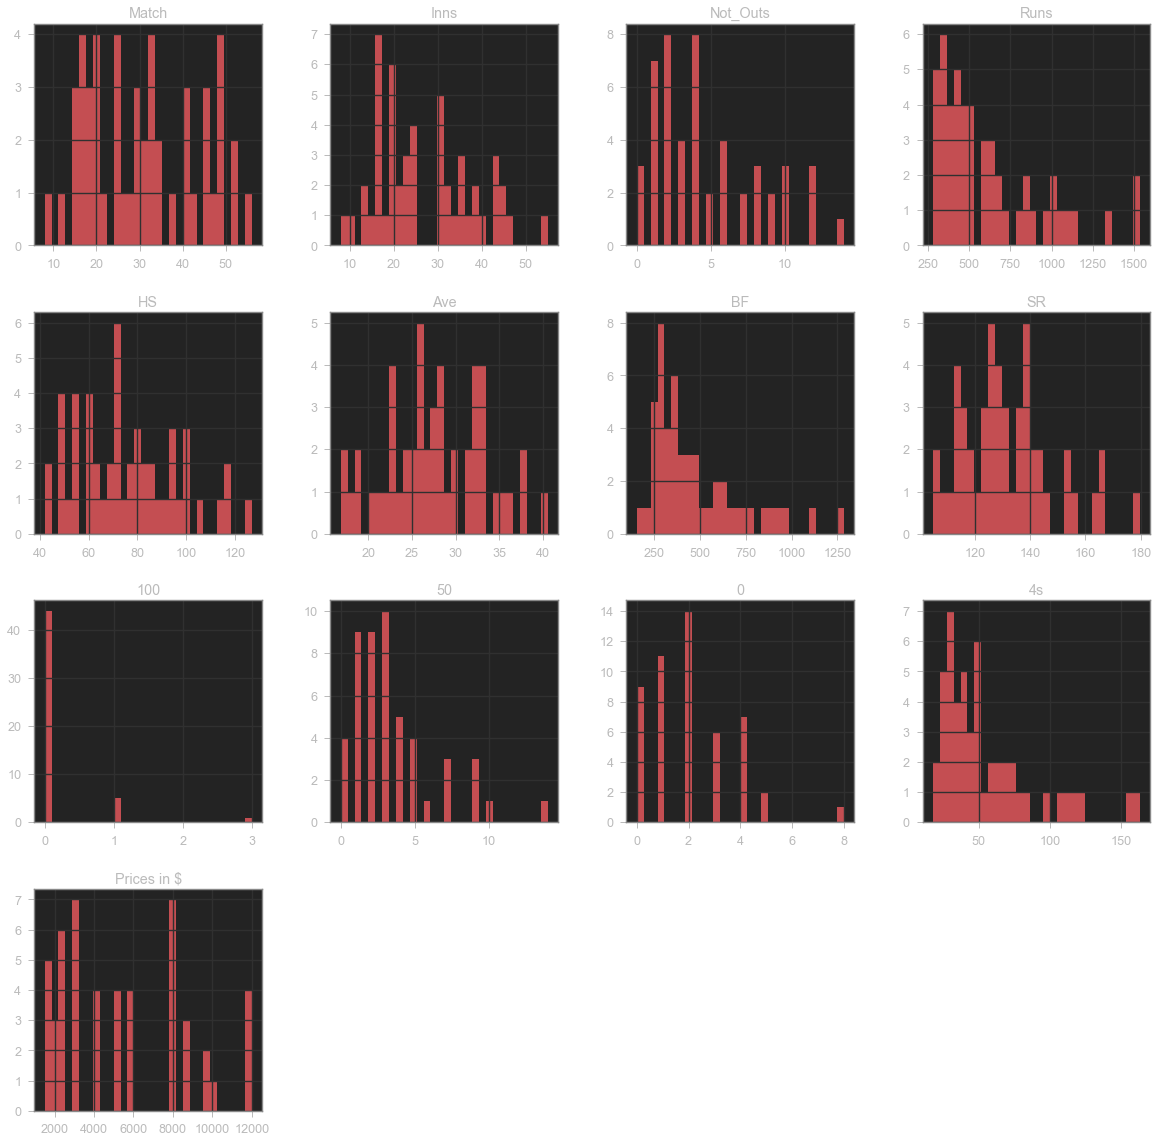

In [18]:
PSL_dataset_df.hist(bins=30, figsize = (20,20), color='r')
plt.show()

In [19]:
# Obtain the correlation matrix
PSL_dataset_df.corr()

,Match,Inns,Not_Outs,Runs,HS,Ave,BF,SR,100,50,0,4s,Prices in $
Match,1.000000,0.957214,0.654342,0.682814,-0.023020,-0.184824,0.679388,-0.040701,0.197113,0.343564,0.582547,0.522372,0.065654
Inns,0.957214,1.000000,0.494672,0.840772,0.159358,-0.041528,0.824869,0.000840,0.289678,0.534524,0.643363,0.699610,0.064918
Not_Outs,0.654342,0.494672,1.000000,0.090714,-0.328370,-0.190536,0.091565,0.021502,-0.119761,-0.221169,0.083476,-0.088699,-0.037561
Runs,0.682814,0.840772,0.090714,1.000000,0.429567,0.393106,0.974098,0.050620,0.384228,0.839357,0.545547,0.946797,0.192099
HS,-0.023020,0.159358,-0.328370,0.429567,1.000000,0.501246,0.348802,0.396954,0.552452,0.450335,0.197038,0.454062,-0.065118
Ave,-0.184824,-0.041528,-0.190536,0.393106,0.501246,1.000000,0.356418,0.262591,0.183800,0.480972,-0.231193,0.466082,0.258589
BF,0.679388,0.824869,0.091565,0.974098,0.348802,0.356418,1.000000,-0.152134,0.316830,0.832013,0.505832,0.931118,0.176456
SR,-0.040701,0.000840,0.021502,0.050620,0.396954,0.262591,-0.152134,1.000000,0.234289,0.005385,0.113039,0.000136,0.018445
100,0.197113,0.289678,-0.119761,0.384228,0.552452,0.183800,0.316830,0.234289,1.000000,0.176913,0.398923,0.401332,0.091366
50,0.343564,0.534524,-0.221169,0.839357,0.450335,0.480972,0.832013,0.005385,0.176913,1.000000,0.474438,0.864386,0.209932


<AxesSubplot:>

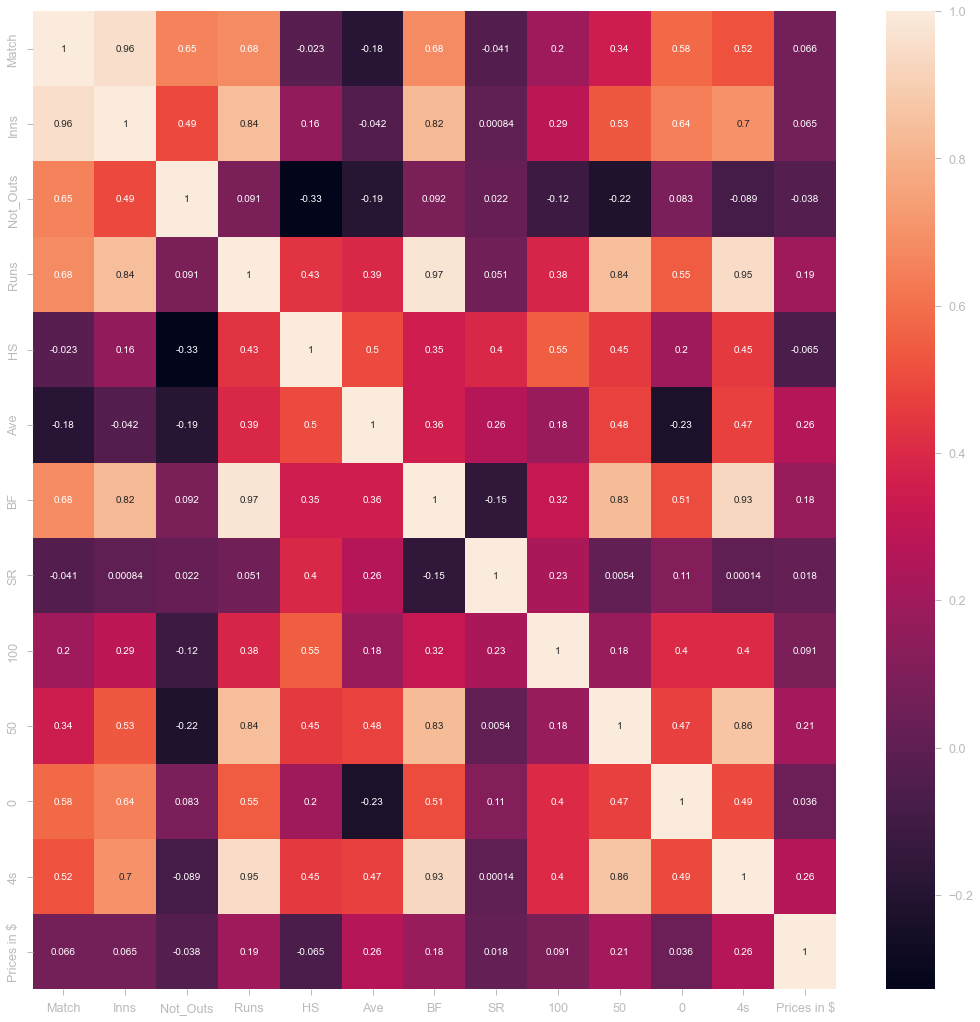

In [20]:
plt.figure(figsize= (18,18))
sns.heatmap(PSL_dataset_df.corr(), annot=True)
# From this pair plot, we can infer that there is a relationship between Price and Overall Variables 
# Also, a relationship between Price and Overall Variables.

 
- Plot the scatterplot between Price in $ and Other Variables and try to relate to the correlation matrix. 
- Plot the scatterplot between Price in $ and Other Variables and try to relate to the correlation matrix. 



<AxesSubplot:ylabel='Prices in $'>

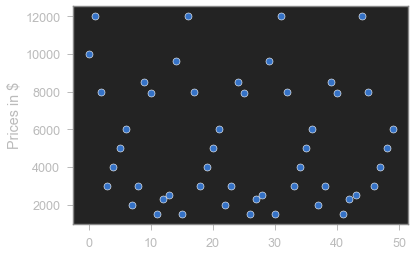

In [36]:
sns.scatterplot(PSL_dataset_df['Prices in $'])

# 3: PREPARE THE DATA BEFORE MODEL TRAINING

In [47]:
PSL_dataset_df['Player'] = pre_p.LabelEncoder().fit_transform(PSL_dataset_df['Player'].values)
PSL_dataset_df['Span'] = pre_p.LabelEncoder().fit_transform(PSL_dataset_df['Span'].values)
t_x = PSL_dataset_df.drop(columns = 'Player')
t_x = PSL_dataset_df.drop(columns = 'Span')
t_x = PSL_dataset_df.drop(columns = 'Prices in $')

t_y = PSL_dataset_df['Prices in $']


In [48]:
t_x.shape

(50, 14)

In [49]:
t_y.shape

(50,)

In [50]:
t_x = np.array(t_x)
t_y = np.array(t_y)

In [51]:
# reshaping the array
t_y = t_y.reshape(-1,1)
t_y.shape

(50, 1)

In [53]:
# scaling the data before feeding the model
from sklearn import preprocessing as pre_p
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x=StandardScaler()


X=scaler_x.fit_transform(t_x)

scalar_y = StandardScaler()
y=scalar_y.fit_transform(t_y)

In [54]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)


MINI CHALLENGE #4: 
- Verify that the split was successful 

In [56]:
X_train.shape

(40, 14)

In [57]:
X_test.shape

(10, 14)

# TASK #5: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

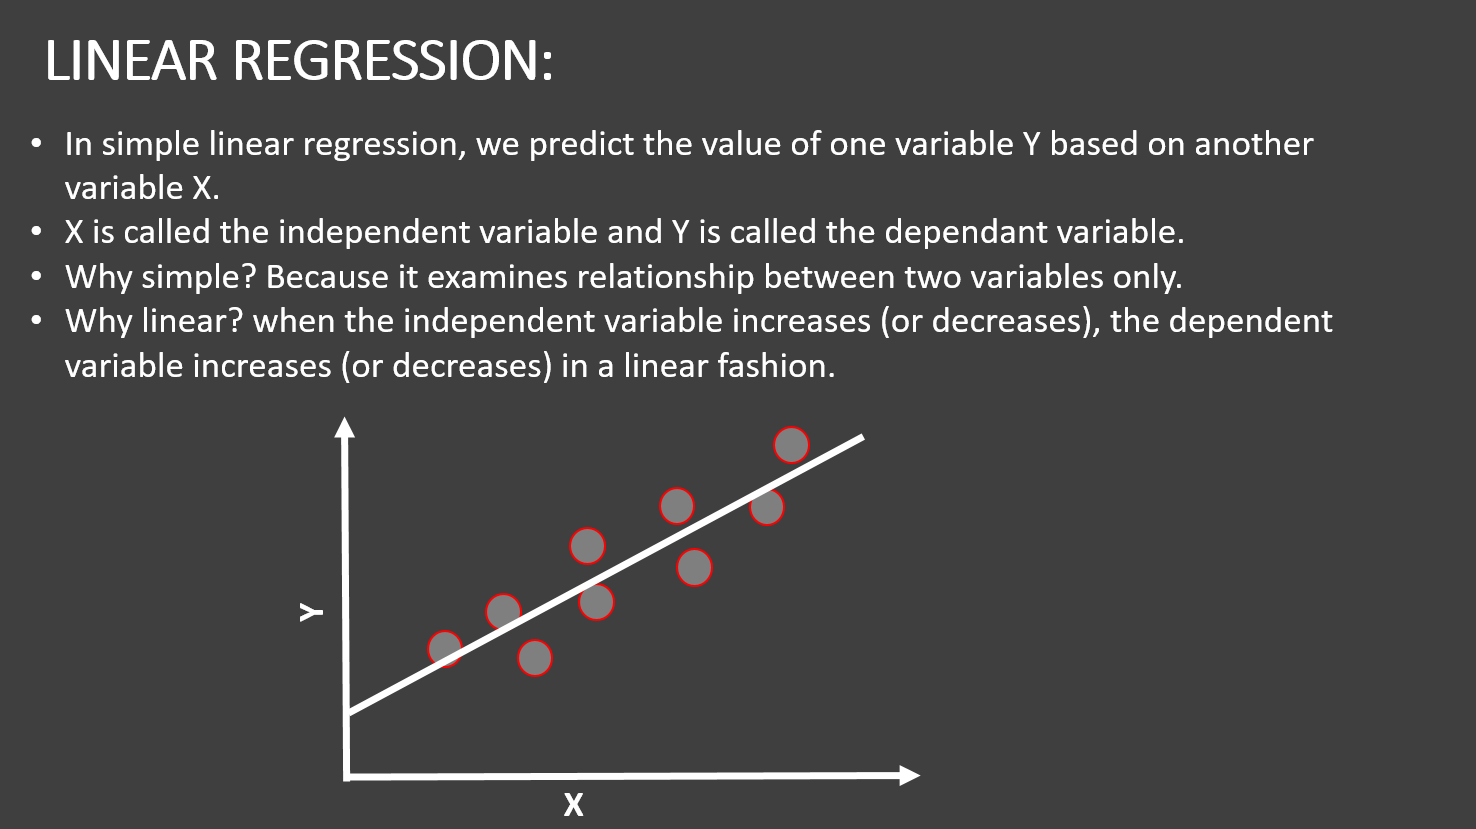

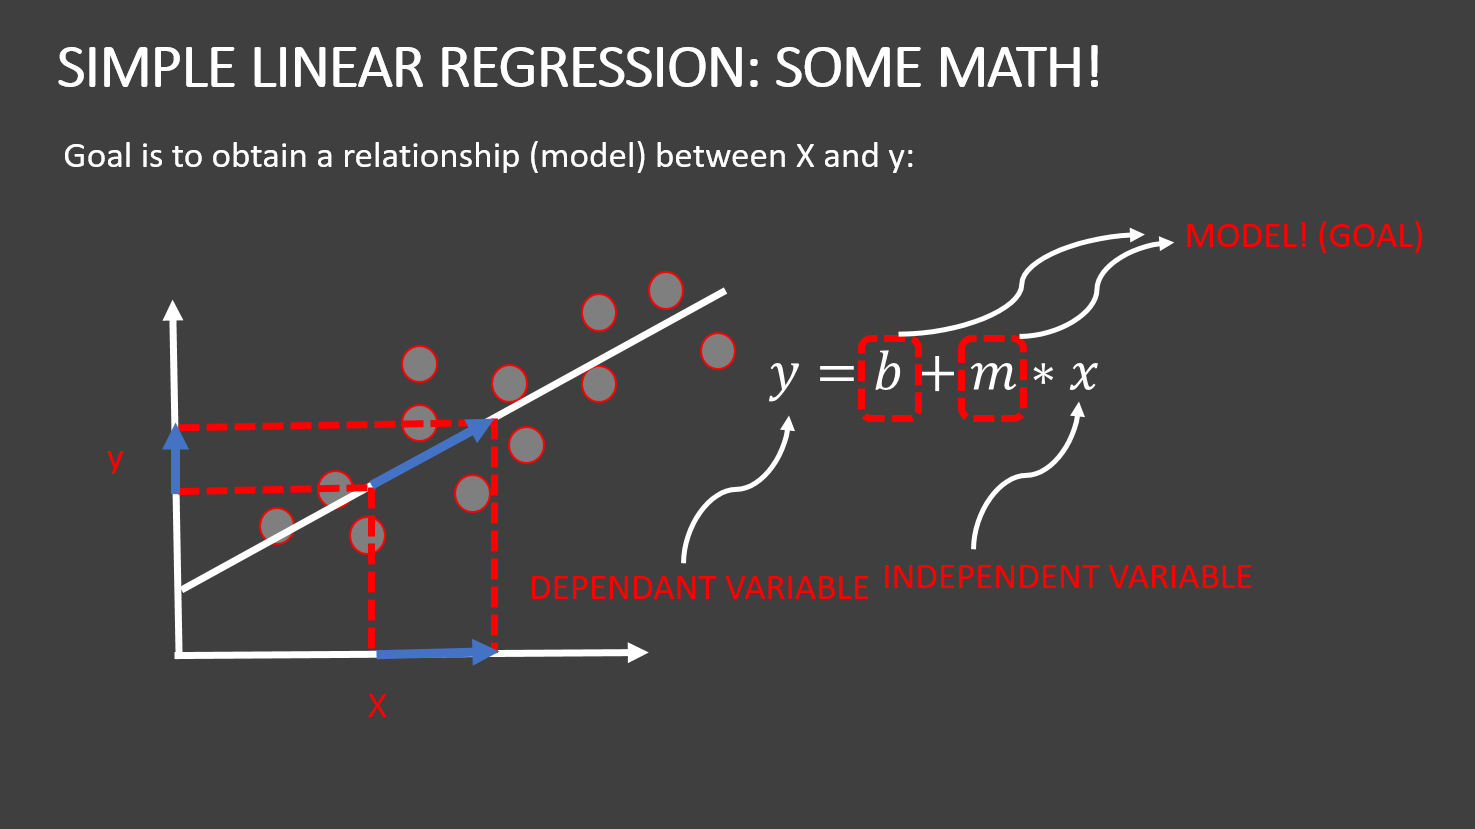

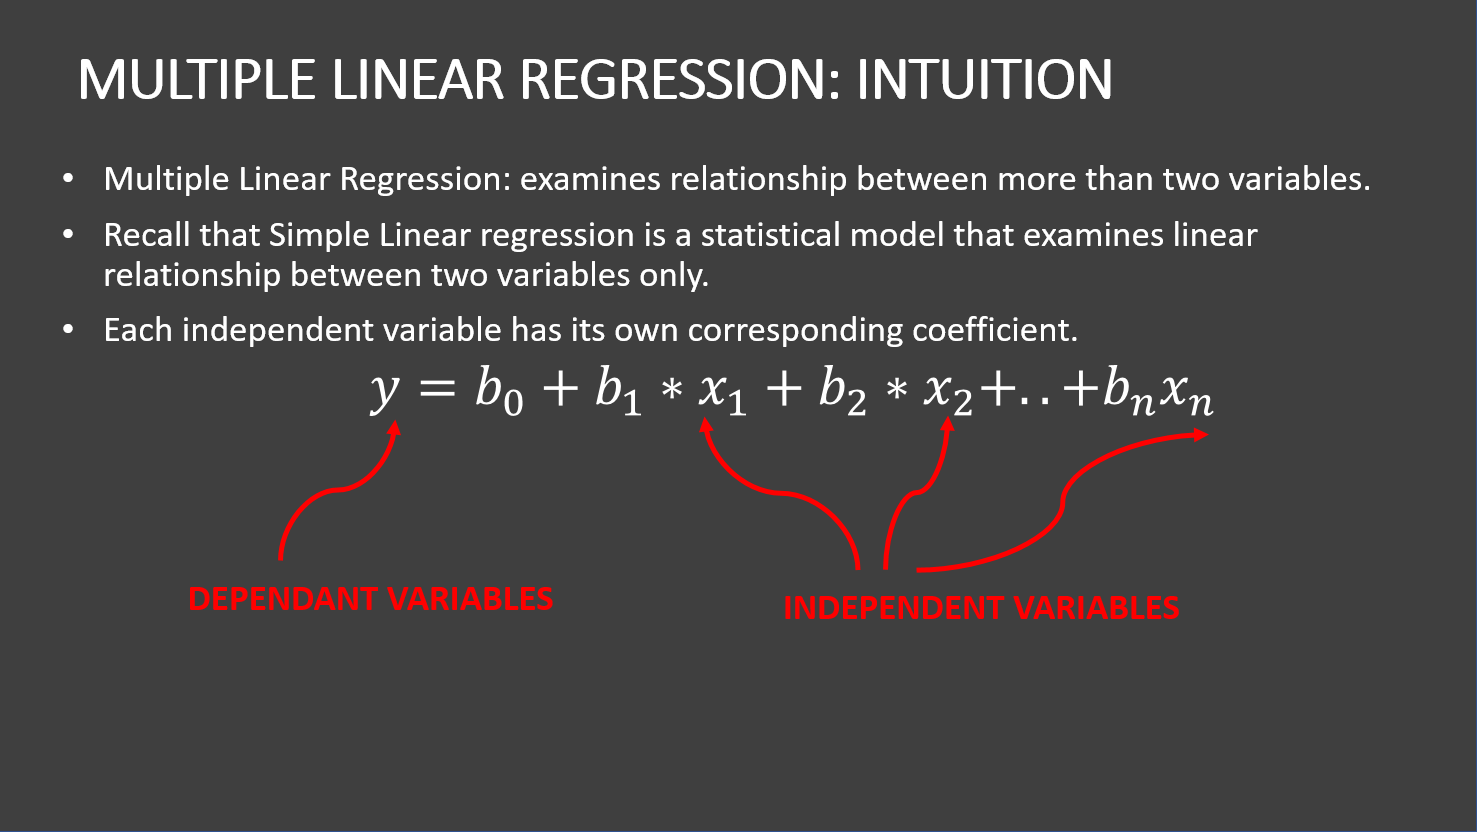

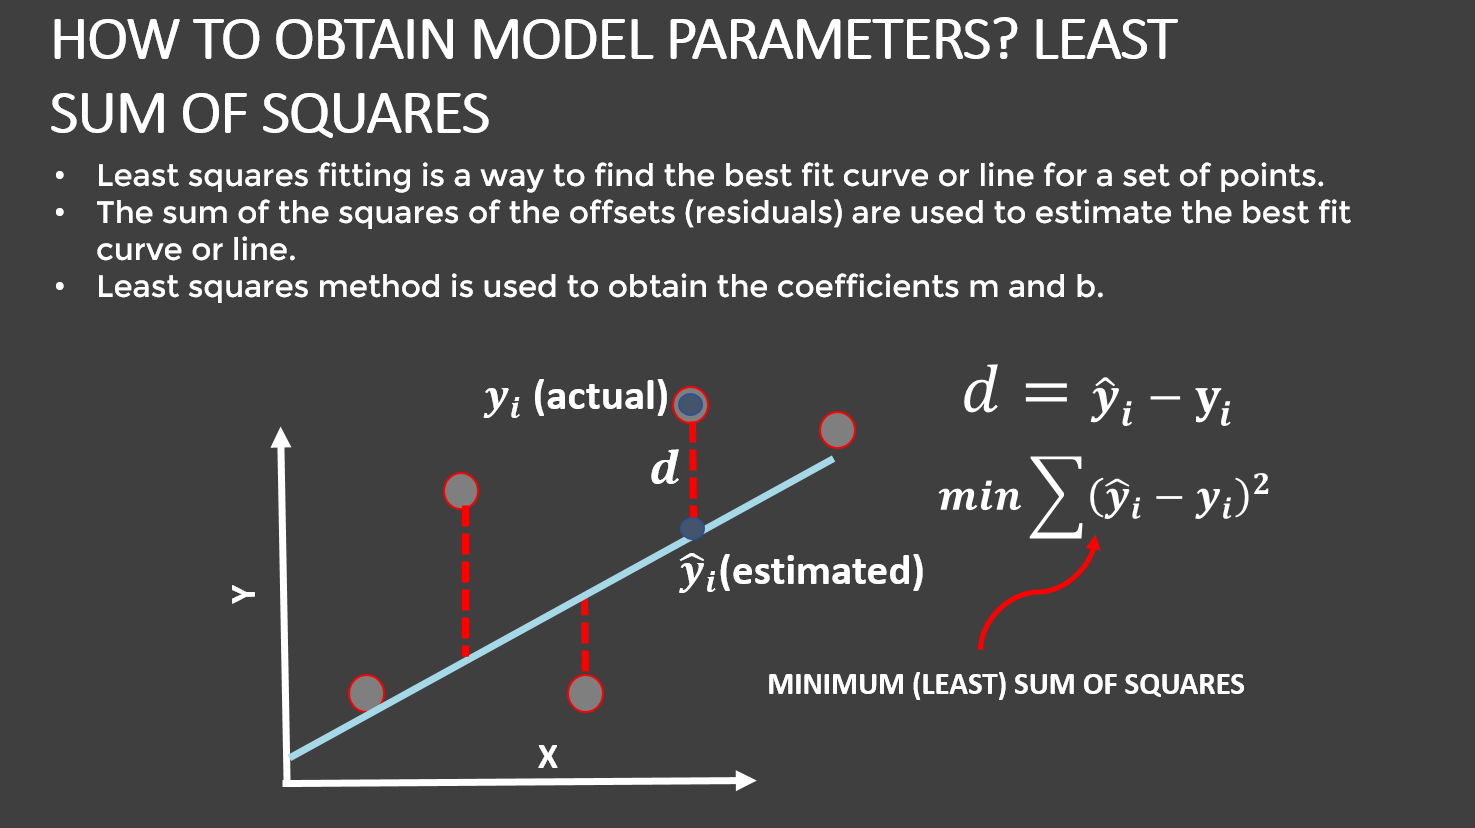

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train, Y_train)

LinearRegression()

In [59]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, Y_test)

In [60]:
accuracy_LinearRegression

-1.4977398429314182

# TASK #6: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [63]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm
from sklearn.tree import DecisionTreeRegressor

DescisionTree_model = DecisionTreeRegressor()
DescisionTree_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [64]:
accuracy_DescisionTree= DescisionTree_model.score(X_test, Y_test)
accuracy_DescisionTree

-0.7892270499403897


- Training a Random Forest Regressor Model with n_estimators = 100 and max_depth of 10 

In [66]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForest_model.fit(X_train, Y_train)

accuracy_RandomForest=RandomForest_model.score(X_test, Y_test)
accuracy_RandomForest

C:\Users\Umair\AppData\Local\Temp\ipykernel_9420\1399892033.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, Y_train)


0.04983829811895579